In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]='0'


In [2]:
"GNN Model"

'GNN Model'

In [3]:
from sklearn.metrics import f1_score

In [4]:
import matplotlib.pyplot as plt


In [5]:
device="cuda"

In [6]:
from tqdm import tqdm

In [7]:
import numpy as np
import torch

/home/chitrank/miniconda3/envs/myenv_py3.8_another/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
torch.__version__

'1.12.0'

In [9]:
torch.cuda.is_available()

True

In [10]:
import pandas as pd

In [11]:
complete_data_df=pd.read_csv("Meta-data/wos_metadata.csv")

In [12]:
complete_data_df

,Y1,Y2,Y,Domain,area,keywords,Abstract
0,0,12,12,CS,Symbolic computation,(2+1)-dimensional non-linear optical waves; e...,(2 + 1)-dimensional non-linear optical waves t...
1,5,2,74,Medical,Alzheimer's Disease,Aging; Tau; Amyloid; PET; Alzheimer's disease...,(beta-amyloid (A beta) and tau pathology becom...
2,4,7,68,Civil,Green Building,LED lighting system; PV system; Distributed l...,(D)ecreasing of energy consumption and environ...
3,1,10,26,ECE,Electric motor,NdFeB magnets; Electric motor; Electric vehic...,(Hybrid) electric vehicles are assumed to play...
4,5,43,115,Medical,Parkinson's Disease,Parkinson's disease; dyskinesia; adenosine A(...,"(L)-3,4-Dihydroxyphenylalanine ((L)-DOPA) rema..."
...,...,...,...,...,...,...,...
46980,5,50,122,Medical,Sports Injuries,Karate; Verletzungsrisiko; Sportverletzung; P...,Zusammenfassung Hintergrund: Karate erfreut si...
46981,0,15,15,CS,Data structures,Z-Wave; Wireless; Embedded systems; Internet ...,Z-Wave is an implementation of home automation...
46982,5,38,110,Medical,Cancer,Antifouling biosensor; Peptide; Electrochemis...,Zwitterionic peptides were anchored to a condu...
46983,0,10,10,CS,Distributed computing,High Performance Computing; Parallel Computin...,ZY-3 has been acquiring high quality imagery s...


In [15]:
"""
Two options of data to choose from
"""
"""
Option A: Complete data
"""
filtered_data=complete_data_df[["Domain","area","Abstract"]]
"""
Option B: 3000 sentences data
"""
# filtered_data=complete_data_df.query("(Domain=='Civil ' and area==' Smart Material  ') or"
#                         "(Domain=='Civil ' and area==' Remote Sensing  ') or"
#                         "(Domain=='MAE ' and area==' computer-aided design  ') or"
#                         "(Domain=='MAE ' and area==' Materials Engineering  ') or"
#                         "(Domain=='MAE ' and area==' Strength of materials  ') or"
#                         "(Domain=='MAE ' and area==' Smart Material  ') or"
#                         "(Domain=='CS ' and area==' Computer graphics  ') or"
#                         "(Domain=='CS ' and area==' Computer vision  ') or"
#                         "(Domain=='CS ' and area==' Image processing  ')").reset_index(drop=True)[["Domain","area","Abstract"]]

'\nOption B: 3000 sentences data\n'

In [16]:
area_unique_to_idx={}
domain_unique_to_idx={}
dict_domain_2_area={}
count=-1
for domain,area in filtered_data.groupby(["Domain","area"]).groups.keys():
    count+=1
    if domain not in dict_domain_2_area: 
        dict_domain_2_area[domain]={}
        domain_unique_to_idx[domain]=len(domain_unique_to_idx)
        # node_to_global_index[domain]=len(domain_unique_to_idx)
    dict_domain_2_area[domain][area]=(len(dict_domain_2_area[domain]),count)
    # node_to_global_index[area] = 
filtered_data["Y1"]=filtered_data["Domain"].apply(lambda x: domain_unique_to_idx[x])
filtered_data["Y2"]=filtered_data.apply(lambda x: dict_domain_2_area[x.Domain][x.area][0], axis=1)
filtered_data["Y"]=filtered_data.apply(lambda x: dict_domain_2_area[x.Domain][x.area][1], axis=1)

dict_domain_2_area

/tmp/ipykernel_622930/1419111401.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Y1"]=filtered_data["Domain"].apply(lambda x: domain_unique_to_idx[x])
/tmp/ipykernel_622930/1419111401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Y2"]=filtered_data.apply(lambda x: dict_domain_2_area[x.Domain][x.area][0], axis=1)
/tmp/ipykernel_622930/1419111401.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

{'CS ': {' Algorithm design  ': (0, 0),
  ' Bioinformatics  ': (1, 1),
  ' Computer graphics  ': (2, 2),
  ' Computer programming  ': (3, 3),
  ' Computer vision  ': (4, 4),
  ' Cryptography  ': (5, 5),
  ' Data structures  ': (6, 6),
  ' Distributed computing  ': (7, 7),
  ' Image processing  ': (8, 8),
  ' Machine learning  ': (9, 9),
  ' Operating systems  ': (10, 10),
  ' Parallel computing  ': (11, 11),
  ' Relational databases  ': (12, 12),
  ' Software engineering  ': (13, 13),
  ' Structured Storage  ': (14, 14),
  ' Symbolic computation  ': (15, 15),
  ' network security  ': (16, 16)},
 'Civil ': {' Ambient Intelligence  ': (0, 17),
  ' Bamboo as a Building Material  ': (1, 18),
  ' Construction Management  ': (2, 19),
  ' Geotextile  ': (3, 20),
  ' Green Building  ': (4, 21),
  ' Highway Network System  ': (5, 22),
  ' Nano Concrete  ': (6, 23),
  ' Rainwater Harvesting  ': (7, 24),
  ' Remote Sensing  ': (8, 25),
  ' Smart Material  ': (9, 26),
  ' Solar Energy  ': (10, 27)

In [17]:
level1_num_nodes=len(dict_domain_2_area)
level2_num_nodes=[len(dict_domain_2_area[domain]) for domain in dict_domain_2_area]
cumulative_num_nodes_level2=[0]
for i in range(1,len(level2_num_nodes)):
    cumulative_num_nodes_level2.append(cumulative_num_nodes_level2[-1]+level2_num_nodes[i-1])
cumulative_num_nodes_level2_list=cumulative_num_nodes_level2
cumulative_num_nodes_level2=torch.Tensor(cumulative_num_nodes_level2).to(device)


In [18]:
dom_glbidx_2_area_glbidx={}
global_index_to_name = {}
for dom,dom_glbidx in domain_unique_to_idx.items():
    if dom_glbidx not in dom_glbidx_2_area_glbidx: 
        dom_glbidx_2_area_glbidx[dom_glbidx]=[]
    # cumulative_l2=cumulative_num_nodes_level2_list[dom_glbidx]
        global_index_to_name[dom_glbidx] = dom
    for area, (_,l2_levelwise_idx) in dict_domain_2_area[dom].items():
        dom_glbidx_2_area_glbidx[dom_glbidx].append(level1_num_nodes+l2_levelwise_idx)
        global_index_to_name[level1_num_nodes+l2_levelwise_idx] = area
        
global_index_to_name

{0: 'CS ',
 7: ' Algorithm design  ',
 8: ' Bioinformatics  ',
 9: ' Computer graphics  ',
 10: ' Computer programming  ',
 11: ' Computer vision  ',
 12: ' Cryptography  ',
 13: ' Data structures  ',
 14: ' Distributed computing  ',
 15: ' Image processing  ',
 16: ' Machine learning  ',
 17: ' Operating systems  ',
 18: ' Parallel computing  ',
 19: ' Relational databases  ',
 20: ' Software engineering  ',
 21: ' Structured Storage  ',
 22: ' Symbolic computation  ',
 23: ' network security  ',
 1: 'Civil ',
 24: ' Ambient Intelligence  ',
 25: ' Bamboo as a Building Material  ',
 26: ' Construction Management  ',
 27: ' Geotextile  ',
 28: ' Green Building  ',
 29: ' Highway Network System  ',
 30: ' Nano Concrete  ',
 31: ' Rainwater Harvesting  ',
 32: ' Remote Sensing  ',
 33: ' Smart Material  ',
 34: ' Solar Energy  ',
 35: ' Stealth Technology  ',
 36: ' Suspension Bridge  ',
 37: ' Transparent Concrete  ',
 38: ' Underwater Windmill  ',
 39: ' Water Pollution  ',
 2: 'ECE ',

In [19]:
dom_glbidx_2_area_glbidx

{0: [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
 1: [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 2: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57],
 3: [58, 59, 60, 61, 62, 63, 64, 65, 66],
 4: [67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122],
 5: [123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141],
 6: [142, 143, 144, 145, 146, 147, 148, 149, 150, 151]}

In [49]:
A_directed=torch.zeros(level1_num_nodes+sum(level2_num_nodes),level1_num_nodes+sum(level2_num_nodes))
for s in dom_glbidx_2_area_glbidx:
    for t in dom_glbidx_2_area_glbidx[s]:
        A_directed[t][s]=1
A_bidirec=A_directed+A_directed.T

In [50]:
A_bidirec

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [51]:
level1_num_nodes,level2_num_nodes,cumulative_num_nodes_level2

(7,
 [17, 16, 18, 9, 56, 19, 10],
 tensor([  0.,  17.,  33.,  51.,  60., 116., 135.], device='cuda:0'))

In [23]:
filtered_data

,Domain,area,Abstract,Y1,Y2,Y
0,CS,Symbolic computation,(2 + 1)-dimensional non-linear optical waves t...,0,15,15
1,Medical,Alzheimer's Disease,(beta-amyloid (A beta) and tau pathology becom...,4,2,62
2,Civil,Green Building,(D)ecreasing of energy consumption and environ...,1,4,21
3,ECE,Electric motor,(Hybrid) electric vehicles are assumed to play...,2,3,36
4,Medical,Parkinson's Disease,"(L)-3,4-Dihydroxyphenylalanine ((L)-DOPA) rema...",4,43,103
...,...,...,...,...,...,...
46980,Medical,Sports Injuries,Zusammenfassung Hintergrund: Karate erfreut si...,4,52,112
46981,CS,Data structures,Z-Wave is an implementation of home automation...,0,6,6
46982,Medical,Cancer,Zwitterionic peptides were anchored to a condu...,4,11,71
46983,CS,Distributed computing,ZY-3 has been acquiring high quality imagery s...,0,7,7


In [24]:
test_val=filtered_data.sample(frac=0.2,random_state=53)
train=filtered_data.drop(test_val.index)
val=test_val.sample(frac=0.5,random_state=101)
test=test_val.drop(val.index)


In [25]:
test.groupby(["Domain","area"]).count()

Abstract  Y1  Y2   Y
Domain        area                                              
CS             Algorithm design                   45  45  45  45
               Bioinformatics                     39  39  39  39
               Computer graphics                  41  41  41  41
               Computer programming               46  46  46  46
               Computer vision                    58  58  58  58
...                                              ...  ..  ..  ..
biochemistry   Immunology                         58  58  58  58
               Molecular biology                  84  84  84  84
               Northern blotting                  63  63  63  63
               Polymerase chain reaction          70  70  70  70
               Southern blotting                  44  44  44  44

[141 rows x 4 columns]

In [26]:

from sentence_transformers import SentenceTransformer
# from sklearn.cluster import AgglomerativeClustering
# import numpy as np

# embedder = SentenceTransformer('all-MiniLM-L6-v2')


In [27]:
embedder = SentenceTransformer('all-MiniLM-L6-v2').to(device)
embedder.eval()

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

In [28]:
embedder.requires_grad_(False)
for k,v in embedder.named_parameters():
    print(v.requires_grad)


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [29]:
# embedder.encode(["ghbhb uhuygh"]).shape
hidden_dim=384

In [44]:
def max_scores(val_scores,test_scores):
    max_epoch=0
    max_val_score=-1
    for epoch in range(len(val_scores)):
        if val_scores[epoch][0]>max_val_score:
            max_val_score=val_scores[epoch][0]
            max_epoch=epoch
    return max_epoch,val_scores[max_epoch],test_scores[max_epoch]

In [32]:
class WOSDataset(torch.utils.data.Dataset):
    """Face Landmarks dataset."""

    def __init__(self, df):
        """
        """
        self.x_d=embedder.encode(df["Abstract"].to_list(),convert_to_tensor=True)
        self.x_y1=embedder.encode(df["Domain"].to_list(),convert_to_tensor=True)
        self.x_y2=embedder.encode(df["area"].to_list(),convert_to_tensor=True)
        self.y=torch.LongTensor(df["Y"].to_list())
        self.y1=torch.LongTensor(df["Y1"].to_list())
        self.y2=torch.LongTensor(df["Y2"].to_list())

    def __len__(self):
        return len(self.x_d)

    def __getitem__(self, idx):

        return (self.x_d[idx],self.x_y1[idx],self.x_y2[idx],
                self.y[idx],self.y1[idx],self.y2[idx])

In [33]:
train_dataset=WOSDataset(train)
val_dataset=WOSDataset(val)
test_dataset=WOSDataset(test)


In [34]:
train_dl = torch.utils.data.DataLoader(train_dataset, batch_size=32,shuffle=True, num_workers=0)
val_dl = torch.utils.data.DataLoader(val_dataset, batch_size=64,shuffle=False, num_workers=0)
test_dl = torch.utils.data.DataLoader(test_dataset, batch_size=64,shuffle=False, num_workers=0)


In [35]:
level1_encoded=embedder.encode(list(dict_domain_2_area.keys()))

In [39]:
class HiererchicalModel(torch.nn.Module):
    def __init__(self):
        super(HiererchicalModel, self).__init__()
        self.d=hidden_dim
        self.text_enc=embedder
        self.lev1_nodes_encoded=level1_encoded
        # self.cumulative_num_labels_l2=cumulative_num_nodes_level2
        self.embedding_transformer=torch.nn.Linear(2*self.d,self.d)
        self.act=torch.nn.GELU()
        self.lin_class_lev1=torch.nn.Linear(self.d,level1_num_nodes)
        self.lin_class_lev2=torch.nn.ModuleList([torch.nn.Linear(self.d,level2_num_nodes[i]) 
                                                 for i in range(level1_num_nodes)])
        self.loss_fn=torch.nn.CrossEntropyLoss(reduction="mean")
    
    def forward(self,x_d,y1=None,y2=None,x_y1=None):
        """
        :param
        x_d --> (B x D)
        x_l1 --> (B x D)
        x_l2 --> (B x D)
        
        """
        B= x_d.shape[0]
        loss=0
        scores_lev1=self.lin_class_lev1(x_d)  # returns B x num_lev1_child
        if y1 is None:
            # Infer level1 labels
            y1=torch.argmax(scores_lev1,dim=-1)
            x_y1=torch.Tensor([self.lev1_nodes_encoded[i] for i in y1]).cuda()
        else:
            loss+=self.loss_fn(scores_lev1,y1)
        x_d1=self.embedding_transformer(torch.cat((x_d,x_y1),dim=1)) # returns N x D
        
        scores_lev2=[self.lin_class_lev2[y1[i]](x_d1[i]) for i in range(B)]
        if y2 is None:
            # Infer level2 labels
            y2=torch.Tensor([torch.argmax(scores_lev2[i]) for i in range(B)]).cuda()
            # print(y2.shape)
        else:
            # y2=y2.view(B,1)
            # print(y2[0].shape)
            loss+=sum([self.loss_fn(scores_lev2[i],y2[i]) for i in range(B)])
        
        return loss,[scores_lev1,scores_lev2],[y1,y2]
        
model=HiererchicalModel().cuda()
optim=torch.optim.AdamW(params=model.parameters(),lr=1e-3)

In [40]:

def eval_fn(model,dl):
    model.eval()
    correct=0
    total_num=0
    correct_list=[]
    actual_class_list=[]
    predict_list=[]
    with torch.no_grad():
        for x_d,x_y1,x_y2,y,y1,y2 in dl:
            loss,_,ys=model(x_d.to(device))
            yp1=ys[0]
            yp2=ys[1]
            y_pred=cumulative_num_nodes_level2[yp1]+yp2
            temp=(y.to(device)==y_pred)
            actual_class_list.extend(y.tolist())
            predict_list.extend(y_pred.cpu().tolist())
            correct+=torch.sum(temp).to(device).cpu().numpy()
            total_num+=len(x_d)
            correct_list+=temp.to(device).tolist()
    f1_score_my=f1_score(actual_class_list, predict_list, average='macro')
    return correct/total_num,correct_list,f1_score_my


#### Baseline 1: Ground Truth at Each Level

In [67]:
num_epochs = 1
accuracies=[]
val_scores=[]
test_scores=[]
for epoch in tqdm(range(num_epochs),desc="Epochs"):
    model.train()
    for x_d,x_y1,x_y2,y,y1,y2 in train_dl:
        loss,_,_=model(x_d.to(device),y1=y1.to(device),y2=y2.to(device),x_y1=x_y1.to(device))
        optim.zero_grad()
        loss.backward()
        optim.step()
    val_accuracy,_,val_f1_score = eval_fn(model,val_dl)
    test_accuracy,_,test_f1_score = eval_fn(model,test_dl)
    val_scores.append((val_accuracy,val_f1_score))
    test_scores.append((test_accuracy,test_f1_score))
    print("Epoch ",epoch,"---",val_accuracy)        
best_epoch,best_val_scores,best_test_scores=max_scores(val_scores,test_scores)
# epochs = [*range(num_epochs)]
# plt.plot(epochs, accuracies, label="Validation Accuracy")


Epochs:   0%|                                                                                                                                                                             | 0/1 [00:00<?, ?it/s]


TypeError: forward() got an unexpected keyword argument 'y1'

In [68]:
best_epoch,best_val_scores,best_test_scores=max_scores(val_scores,test_scores)


IndexError: list index out of range

In [30]:
test["accuracy"]=test_correct_list

In [31]:
test.groupby(["Domain","area"]).agg({"accuracy":np.mean})

accuracy
Domain area                              
CS      Computer graphics        0.852941
        Computer vision          0.717949
        Image processing         0.666667
Civil   Remote Sensing           0.755556
        Smart Material           0.725000
MAE     Materials Engineering    0.695652
        Strength of materials    0.767442
        computer-aided design    0.645161

##### Learning Rate Tuning

In [49]:
# import matplotlib.pyplot as plt
# lr_arr = np.logspace(-5, 0, num=6)
# num_epochs=10
# accuracies = []
# for lr_val in lr_arr:
#     optim=torch.optim.AdamW(params=model.parameters(),lr=lr_val)
#     for epoch in tqdm(range(num_epochs),desc="Epochs"):
#         model.train()
#         # for x_d,x_y1,x_y2,y,y1,y2 in tqdm(train_dl,total=len(train)//32):
#         for x_d,x_y1,x_y2,y,y1,y2 in train_dl:
#             loss,scores,ys=model(x_d.to(device),y1=y1.to(device),y2=y2.to(device),x_y1=x_y1.to(device))
#             optim.zero_grad()
#             loss.backward()
#             optim.step()
#         accuracy = eval_fn(model,val_dl)[0]
        
#         print("Epoch ",epoch,"---",accuracy)   
#     print("Accuracy to append ", accuracy)
#     accuracies.append(accuracy)

# plt.plot(lr_arr, accuracies, label="Validation Accuracy")
# plt.xscale("log")

#### Baseline 3: Classification into all L2 labels directly

In [50]:
class HiererchicalModelB3(torch.nn.Module):
    def __init__(self):
        super(HiererchicalModelB3, self).__init__()
        self.d=hidden_dim
        self.act=torch.nn.GELU()
        self.ll1 = torch.nn.Linear(self.d, self.d)
        self.ll2 = torch.nn.Linear(self.d, self.d)
        self.ll3 = torch.nn.Linear(self.d, self.d)
        self.lin_class_lev2 = torch.nn.Linear(self.d, np.sum(level2_num_nodes))
        self.loss_fn=torch.nn.CrossEntropyLoss(reduction="mean")
    
    def forward(self,x_d, y2=None):
        """
        :param
        x_d --> (B x D)
        x_l2 --> (B x D)
        
        """
        B= x_d.shape[0]
        loss=0
        x_d=self.act(self.ll1(x_d))
        x_d=self.act(self.ll2(x_d))
        x_d=self.act(self.ll3(x_d))
        scores_lev2=self.lin_class_lev2(x_d)  # returns B x num_lev1_child
        if y2 is None:
            # Infer level1 labels
            y2=torch.argmax(scores_lev2,dim=-1)
            # y2 = y2.type(torch.LongTensor) 
        else:
            loss+=self.loss_fn(scores_lev2,y2)
        
        return loss, scores_lev2, y2
        
model=HiererchicalModelB3().to(device)
optim=torch.optim.AdamW(params=model.parameters(),lr=1e-3)

In [54]:
def eval_fn(model,dl):
    model.eval()
    correct=0
    total_num=0
    correct_list=[]
    actual_class_list=[]
    predict_list=[]
    with torch.no_grad():
        for x_d,x_y1,x_y2,y,y1,y2 in dl:
            loss,_,ys=model(x_d.to(device))
            temp=y.to(device)==(ys)
            actual_class_list.extend(y.tolist())
            predict_list.extend(ys.cpu().tolist())
            correct+=torch.sum(temp).to(device).cpu().numpy()
            total_num+=len(x_d)
            correct_list+=temp.to(device).tolist()
    f1_score_my=f1_score(actual_class_list, predict_list, average='macro')
    return correct/total_num,correct_list,f1_score_my


Epochs:   1%|█▋                                                                                                                                                                 | 1/100 [00:00<00:27,  3.63it/s]

Epoch  0 --- 0.30333333333333334


Epochs:   2%|███▎                                                                                                                                                               | 2/100 [00:00<00:25,  3.90it/s]

Epoch  1 --- 0.30666666666666664


Epochs:   3%|████▉                                                                                                                                                              | 3/100 [00:00<00:24,  3.99it/s]

Epoch  2 --- 0.31333333333333335


Epochs:   4%|██████▌                                                                                                                                                            | 4/100 [00:00<00:23,  4.13it/s]

Epoch  3 --- 0.30333333333333334


Epochs:   5%|████████▏                                                                                                                                                          | 5/100 [00:01<00:22,  4.19it/s]

Epoch  4 --- 0.30666666666666664


Epochs:   6%|█████████▊                                                                                                                                                         | 6/100 [00:01<00:22,  4.25it/s]

Epoch  5 --- 0.30333333333333334


Epochs:   7%|███████████▍                                                                                                                                                       | 7/100 [00:01<00:21,  4.28it/s]

Epoch  6 --- 0.3


Epochs:   8%|█████████████                                                                                                                                                      | 8/100 [00:01<00:22,  4.18it/s]

Epoch  7 --- 0.2966666666666667


Epochs:   9%|██████████████▋                                                                                                                                                    | 9/100 [00:02<00:22,  4.13it/s]

Epoch  8 --- 0.3


Epochs:  10%|████████████████▏                                                                                                                                                 | 10/100 [00:02<00:22,  4.04it/s]

Epoch  9 --- 0.2833333333333333


Epochs:  11%|█████████████████▊                                                                                                                                                | 11/100 [00:02<00:21,  4.13it/s]

Epoch  10 --- 0.31


Epochs:  12%|███████████████████▍                                                                                                                                              | 12/100 [00:02<00:21,  4.12it/s]

Epoch  11 --- 0.3


Epochs:  13%|█████████████████████                                                                                                                                             | 13/100 [00:03<00:20,  4.18it/s]

Epoch  12 --- 0.29


Epochs:  14%|██████████████████████▋                                                                                                                                           | 14/100 [00:03<00:20,  4.11it/s]

Epoch  13 --- 0.29


Epochs:  15%|████████████████████████▎                                                                                                                                         | 15/100 [00:03<00:20,  4.09it/s]

Epoch  14 --- 0.3


Epochs:  16%|█████████████████████████▉                                                                                                                                        | 16/100 [00:03<00:20,  4.17it/s]

Epoch  15 --- 0.29333333333333333


Epochs:  17%|███████████████████████████▌                                                                                                                                      | 17/100 [00:04<00:19,  4.24it/s]

Epoch  16 --- 0.29333333333333333


Epochs:  18%|█████████████████████████████▏                                                                                                                                    | 18/100 [00:04<00:19,  4.29it/s]

Epoch  17 --- 0.29333333333333333


Epochs:  19%|██████████████████████████████▊                                                                                                                                   | 19/100 [00:04<00:18,  4.31it/s]

Epoch  18 --- 0.29


Epochs:  20%|████████████████████████████████▍                                                                                                                                 | 20/100 [00:04<00:18,  4.35it/s]

Epoch  19 --- 0.29333333333333333


Epochs:  21%|██████████████████████████████████                                                                                                                                | 21/100 [00:05<00:18,  4.37it/s]

Epoch  20 --- 0.2866666666666667


Epochs:  22%|███████████████████████████████████▋                                                                                                                              | 22/100 [00:05<00:17,  4.36it/s]

Epoch  21 --- 0.2966666666666667


Epochs:  23%|█████████████████████████████████████▎                                                                                                                            | 23/100 [00:05<00:18,  4.24it/s]

Epoch  22 --- 0.30333333333333334


Epochs:  24%|██████████████████████████████████████▉                                                                                                                           | 24/100 [00:05<00:17,  4.27it/s]

Epoch  23 --- 0.29


Epochs:  25%|████████████████████████████████████████▌                                                                                                                         | 25/100 [00:05<00:17,  4.23it/s]

Epoch  24 --- 0.2866666666666667


Epochs:  26%|██████████████████████████████████████████                                                                                                                        | 26/100 [00:06<00:17,  4.28it/s]

Epoch  25 --- 0.2733333333333333


Epochs:  27%|███████████████████████████████████████████▋                                                                                                                      | 27/100 [00:06<00:16,  4.30it/s]

Epoch  26 --- 0.2633333333333333


Epochs:  28%|█████████████████████████████████████████████▎                                                                                                                    | 28/100 [00:06<00:16,  4.25it/s]

Epoch  27 --- 0.29333333333333333


Epochs:  29%|██████████████████████████████████████████████▉                                                                                                                   | 29/100 [00:06<00:17,  4.17it/s]

Epoch  28 --- 0.28


Epochs:  30%|████████████████████████████████████████████████▌                                                                                                                 | 30/100 [00:07<00:16,  4.24it/s]

Epoch  29 --- 0.2866666666666667


Epochs:  31%|██████████████████████████████████████████████████▏                                                                                                               | 31/100 [00:07<00:16,  4.30it/s]

Epoch  30 --- 0.29333333333333333


Epochs:  32%|███████████████████████████████████████████████████▊                                                                                                              | 32/100 [00:07<00:15,  4.32it/s]

Epoch  31 --- 0.29333333333333333


Epochs:  33%|█████████████████████████████████████████████████████▍                                                                                                            | 33/100 [00:07<00:15,  4.23it/s]

Epoch  32 --- 0.29


Epochs:  34%|███████████████████████████████████████████████████████                                                                                                           | 34/100 [00:08<00:15,  4.23it/s]

Epoch  33 --- 0.2866666666666667


Epochs:  35%|████████████████████████████████████████████████████████▋                                                                                                         | 35/100 [00:08<00:15,  4.29it/s]

Epoch  34 --- 0.2833333333333333


Epochs:  36%|██████████████████████████████████████████████████████████▎                                                                                                       | 36/100 [00:08<00:14,  4.30it/s]

Epoch  35 --- 0.29


Epochs:  37%|███████████████████████████████████████████████████████████▉                                                                                                      | 37/100 [00:08<00:14,  4.34it/s]

Epoch  36 --- 0.2866666666666667


Epochs:  38%|█████████████████████████████████████████████████████████████▌                                                                                                    | 38/100 [00:09<00:14,  4.23it/s]

Epoch  37 --- 0.29


Epochs:  39%|███████████████████████████████████████████████████████████████▏                                                                                                  | 39/100 [00:09<00:14,  4.24it/s]

Epoch  38 --- 0.2866666666666667


Epochs:  40%|████████████████████████████████████████████████████████████████▊                                                                                                 | 40/100 [00:09<00:14,  4.29it/s]

Epoch  39 --- 0.2866666666666667


Epochs:  41%|██████████████████████████████████████████████████████████████████▍                                                                                               | 41/100 [00:09<00:13,  4.30it/s]

Epoch  40 --- 0.2866666666666667


Epochs:  42%|████████████████████████████████████████████████████████████████████                                                                                              | 42/100 [00:09<00:13,  4.23it/s]

Epoch  41 --- 0.29


Epochs:  43%|█████████████████████████████████████████████████████████████████████▋                                                                                            | 43/100 [00:10<00:13,  4.23it/s]

Epoch  42 --- 0.2866666666666667


Epochs:  44%|███████████████████████████████████████████████████████████████████████▎                                                                                          | 44/100 [00:10<00:13,  4.30it/s]

Epoch  43 --- 0.2866666666666667


Epochs:  45%|████████████████████████████████████████████████████████████████████████▉                                                                                         | 45/100 [00:10<00:12,  4.33it/s]

Epoch  44 --- 0.2866666666666667


Epochs:  46%|██████████████████████████████████████████████████████████████████████████▌                                                                                       | 46/100 [00:10<00:12,  4.39it/s]

Epoch  45 --- 0.29


Epochs:  47%|████████████████████████████████████████████████████████████████████████████▏                                                                                     | 47/100 [00:11<00:12,  4.38it/s]

Epoch  46 --- 0.2866666666666667


Epochs:  48%|█████████████████████████████████████████████████████████████████████████████▊                                                                                    | 48/100 [00:11<00:11,  4.42it/s]

Epoch  47 --- 0.29


Epochs:  49%|███████████████████████████████████████████████████████████████████████████████▍                                                                                  | 49/100 [00:11<00:11,  4.43it/s]

Epoch  48 --- 0.29


Epochs:  50%|█████████████████████████████████████████████████████████████████████████████████                                                                                 | 50/100 [00:11<00:11,  4.46it/s]

Epoch  49 --- 0.2866666666666667


Epochs:  51%|██████████████████████████████████████████████████████████████████████████████████▌                                                                               | 51/100 [00:11<00:11,  4.35it/s]

Epoch  50 --- 0.2866666666666667


Epochs:  52%|████████████████████████████████████████████████████████████████████████████████████▏                                                                             | 52/100 [00:12<00:11,  4.19it/s]

Epoch  51 --- 0.29


Epochs:  53%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                            | 53/100 [00:12<00:11,  4.25it/s]

Epoch  52 --- 0.29


Epochs:  54%|███████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 54/100 [00:12<00:10,  4.21it/s]

Epoch  53 --- 0.29


Epochs:  55%|█████████████████████████████████████████████████████████████████████████████████████████                                                                         | 55/100 [00:12<00:10,  4.14it/s]

Epoch  54 --- 0.29


Epochs:  56%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 56/100 [00:13<00:10,  4.22it/s]

Epoch  55 --- 0.29


Epochs:  57%|████████████████████████████████████████████████████████████████████████████████████████████▎                                                                     | 57/100 [00:13<00:10,  4.27it/s]

Epoch  56 --- 0.29


Epochs:  58%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                    | 58/100 [00:13<00:09,  4.26it/s]

Epoch  57 --- 0.29


Epochs:  59%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 59/100 [00:13<00:09,  4.31it/s]

Epoch  58 --- 0.29


Epochs:  60%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                | 60/100 [00:14<00:09,  4.33it/s]

Epoch  59 --- 0.29


Epochs:  61%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                               | 61/100 [00:14<00:09,  4.29it/s]

Epoch  60 --- 0.29


Epochs:  62%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 62/100 [00:14<00:08,  4.31it/s]

Epoch  61 --- 0.29


Epochs:  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                            | 63/100 [00:14<00:08,  4.34it/s]

Epoch  62 --- 0.29


Epochs:  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 64/100 [00:15<00:08,  4.29it/s]

Epoch  63 --- 0.2866666666666667


Epochs:  65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 65/100 [00:15<00:08,  4.31it/s]

Epoch  64 --- 0.2866666666666667


Epochs:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                       | 66/100 [00:15<00:07,  4.35it/s]

Epoch  65 --- 0.2866666666666667


Epochs:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 67/100 [00:15<00:07,  4.40it/s]

Epoch  66 --- 0.2866666666666667


Epochs:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 68/100 [00:15<00:07,  4.30it/s]

Epoch  67 --- 0.2866666666666667


Epochs:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 69/100 [00:16<00:07,  4.30it/s]

Epoch  68 --- 0.2866666666666667


Epochs:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 70/100 [00:16<00:06,  4.32it/s]

Epoch  69 --- 0.29333333333333333


Epochs:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                               | 71/100 [00:16<00:06,  4.32it/s]

Epoch  70 --- 0.29333333333333333


Epochs:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 72/100 [00:16<00:06,  4.34it/s]

Epoch  71 --- 0.29333333333333333


Epochs:  73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 73/100 [00:17<00:06,  4.28it/s]

Epoch  72 --- 0.29


Epochs:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 74/100 [00:17<00:06,  4.19it/s]

Epoch  73 --- 0.29


Epochs:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 75/100 [00:17<00:05,  4.24it/s]

Epoch  74 --- 0.29


Epochs:  76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 76/100 [00:17<00:05,  4.28it/s]

Epoch  75 --- 0.2866666666666667


Epochs:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 77/100 [00:18<00:05,  4.25it/s]

Epoch  76 --- 0.2866666666666667


Epochs:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 78/100 [00:18<00:05,  4.19it/s]

Epoch  77 --- 0.2866666666666667


Epochs:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 79/100 [00:18<00:04,  4.25it/s]

Epoch  78 --- 0.2866666666666667


Epochs:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 80/100 [00:18<00:04,  4.20it/s]

Epoch  79 --- 0.29


Epochs:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 81/100 [00:19<00:04,  4.25it/s]

Epoch  80 --- 0.2866666666666667


Epochs:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 82/100 [00:19<00:04,  4.26it/s]

Epoch  81 --- 0.29


Epochs:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 83/100 [00:19<00:03,  4.28it/s]

Epoch  82 --- 0.2833333333333333


Epochs:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 84/100 [00:19<00:03,  4.23it/s]

Epoch  83 --- 0.2866666666666667


Epochs:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 85/100 [00:19<00:03,  4.17it/s]

Epoch  84 --- 0.2866666666666667


Epochs:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 86/100 [00:20<00:03,  4.13it/s]

Epoch  85 --- 0.29


Epochs:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 87/100 [00:20<00:03,  4.14it/s]

Epoch  86 --- 0.2866666666666667


Epochs:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 88/100 [00:20<00:02,  4.22it/s]

Epoch  87 --- 0.29


Epochs:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 89/100 [00:20<00:02,  4.22it/s]

Epoch  88 --- 0.29


Epochs:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 90/100 [00:21<00:02,  4.28it/s]

Epoch  89 --- 0.29


Epochs:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 91/100 [00:21<00:02,  4.19it/s]

Epoch  90 --- 0.29


Epochs:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 92/100 [00:21<00:01,  4.17it/s]

Epoch  91 --- 0.29


Epochs:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 93/100 [00:21<00:01,  4.23it/s]

Epoch  92 --- 0.29


Epochs:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 94/100 [00:22<00:01,  4.35it/s]

Epoch  93 --- 0.29


Epochs:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 95/100 [00:22<00:01,  4.38it/s]

Epoch  94 --- 0.29


Epochs:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 96/100 [00:22<00:00,  4.40it/s]

Epoch  95 --- 0.2866666666666667


Epochs:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 97/100 [00:22<00:00,  4.30it/s]

Epoch  96 --- 0.29


Epochs:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 98/100 [00:23<00:00,  4.33it/s]

Epoch  97 --- 0.2866666666666667


Epochs:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 99/100 [00:23<00:00,  4.36it/s]

Epoch  98 --- 0.29


Epochs: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:23<00:00,  4.26it/s]

Epoch  99 --- 0.29


ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

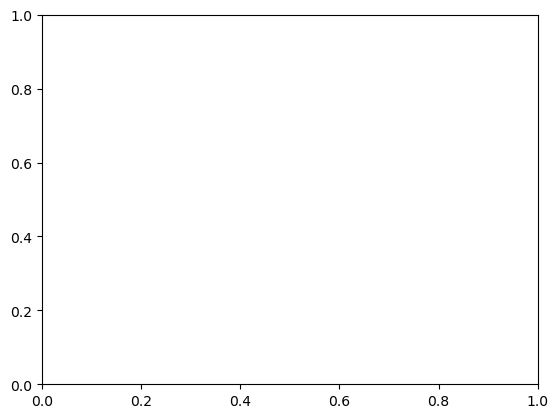

In [55]:
num_epochs = 100
accuracies=[]
val_scores=[]
test_scores=[]
for epoch in tqdm(range(num_epochs),desc="Epochs"):
    model.train()
    for x_d,x_y1,x_y2,y,y1,y2 in train_dl:
        loss,_,_=model(x_d.to(device), y2=y2.to(device))
        optim.zero_grad()
        loss.backward()
        optim.step()
    val_accuracy,_,val_f1_score = eval_fn(model,val_dl)
    test_accuracy,_,test_f1_score = eval_fn(model,test_dl)
    val_scores.append((val_accuracy,val_f1_score))
    test_scores.append((test_accuracy,test_f1_score))
    print("Epoch ",epoch,"---",val_accuracy)        
best_epoch,best_val_scores,best_test_scores=max_scores(val_scores,test_scores)


In [30]:
"""
Steps 
1. Create Graph Object where every node has an integer ID corresponding to ground truth
2. Instances of graph object, retreive node representation, adj matrix
3. Figure out condensor (feature propogation)
4. Make sure adjacency matrix does not get trained
"""

'\nSteps \n1. Create Graph Object where every node has an integer ID corresponding to ground truth\n2. Instances of graph object, retreive node representation, adj matrix\n3. Figure out condensor (feature propogation)\n4. Make sure adjacency matrix does not get trained\n'

In [31]:
class WOSDatasetGNN(torch.utils.data.Dataset):
    """Face Landmarks dataset."""

    def __init__(self, df):
        """
        """
        self.x_d=embedder.encode(df["Abstract"].to_list(),convert_to_tensor=True)
        # self.x_y1=embedder.encode(df["Domain"].to_list(),convert_to_tensor=True)
        # self.x_y2=embedder.encode(df["area"].to_list(),convert_to_tensor=True)
        # self.y=torch.LongTensor(df["Y"].to_list())
        self.y1 = 0*torch.nn.functional.one_hot(torch.LongTensor(df["Y1"].to_list()), num_classes=level1_num_nodes)
        self.y2 = torch.nn.functional.one_hot(torch.LongTensor(df["Y"].to_list()), num_classes=np.sum(level2_num_nodes))
        self.y = 1.0*torch.cat((self.y1, self.y2), dim=-1)
        self.y_int=torch.LongTensor(df["Y"].to_list())+level1_num_nodes
        
    def __len__(self):
        return len(self.x_d)

    def __getitem__(self, idx):

        return (self.x_d[idx],self.y_int[idx],self.y[idx])

In [32]:
train_dataset_gnn=WOSDatasetGNN(train)
val_dataset_gnn=WOSDatasetGNN(val)
test_dataset_gnn=WOSDatasetGNN(test)


In [33]:
train_dl_gnn = torch.utils.data.DataLoader(train_dataset_gnn, batch_size=32,shuffle=True, num_workers=0)
val_dl_gnn = torch.utils.data.DataLoader(val_dataset_gnn, batch_size=64,shuffle=False, num_workers=0)
test_dl_gnn = torch.utils.data.DataLoader(test_dataset_gnn, batch_size=64,shuffle=False, num_workers=0)


In [34]:
for x in test_dl_gnn:
    print(x[2])
    break

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [35]:
labels = []
for i in range(len(global_index_to_name)):
    labels.append(global_index_to_name[i])
print(labels)
all_labels_encoded = embedder.encode(labels,convert_to_tensor=True)

['CS ', 'Civil ', 'ECE ', 'MAE ', 'Medical ', 'Psychology  ', 'biochemistry ', ' Algorithm design  ', ' Bioinformatics  ', ' Computer graphics  ', ' Computer programming  ', ' Computer vision  ', ' Cryptography  ', ' Data structures  ', ' Distributed computing  ', ' Image processing  ', ' Machine learning  ', ' Operating systems  ', ' Parallel computing  ', ' Relational databases  ', ' Software engineering  ', ' Structured Storage  ', ' Symbolic computation  ', ' network security  ', ' Ambient Intelligence  ', ' Bamboo as a Building Material  ', ' Construction Management  ', ' Geotextile  ', ' Green Building  ', ' Highway Network System  ', ' Nano Concrete  ', ' Rainwater Harvesting  ', ' Remote Sensing  ', ' Smart Material  ', ' Solar Energy  ', ' Stealth Technology  ', ' Suspension Bridge  ', ' Transparent Concrete  ', ' Underwater Windmill  ', ' Water Pollution  ', ' Analog signal processing  ', ' Control engineering  ', ' Digital control  ', ' Electric motor  ', ' Electrical circui

In [36]:
x=torch.Tensor(A_bidirec)
x.requires_grad

False

In [37]:
A_directed

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [52]:
class GraphTransformer(torch.nn.Module):
    def __init__(self,num_convs):
        super(GraphTransformer, self).__init__()
        self.num_convs=num_convs
        self.node_representation = all_labels_encoded # Nl x D
        self.NL = all_labels_encoded.shape[0]
        # self.A=torch.Tensor(A_bidirec).to(device)
        self.A=torch.Tensor(A_directed).to(device)
        self.hidden_dim=hidden_dim
        self.A_til = (self.A/(1e-8+torch.sum(self.A,dim=-1,keepdim=True)))+torch.eye(self.NL).to(device)
        self.loss = torch.nn.BCEWithLogitsLoss(reduction = 'mean')
        self.lin1 = torch.nn.Linear(self.hidden_dim, 1)
        self.condensor = torch.nn.Linear(2*self.hidden_dim, self.hidden_dim) #Converts 2D -> D via a linear layer
        self.act=torch.nn.GELU()
        
    def GCNConv(self, x,option="cat,conv,cond"):
        B = x.shape[0]
        if option=="cat,conv,cond":
            return self.act(torch.matmul(self.A_til,x))
        else:
            return None

    def forward(self, x_d, y=None,option="cat,conv,cond"):
        """ 
        :param x_d = input document set (B x N x D)
        :return scores (B x N), loss (B)
        
        """
        B = x_d.shape[0]
        if option=="cat,conv,cond":
            x_prime = torch.tile(torch.unsqueeze(x_d, dim=1), dims=(1, self.NL, 1))# B x Nl x  D
            node_representation_m = torch.tile(torch.unsqueeze(self.node_representation, dim=0), dims=(B, 1, 1))    
            for i in range(self.num_convs): #Nodes with 5 from current node get information
                # print(x_prime.shape,node_representation_m.shape)
                x_prime=torch.cat((x_prime, node_representation_m), dim=-1)
                x_prime = self.GCNConv(x_prime,option)
                x_prime = self.condensor(x_prime)
                x_prime = self.act(x_prime)

            scores = torch.squeeze(self.lin1(x_prime), dim=-1) #Scores = (B x N)
            # print(scores.dtype,y.dtype)
            d_loss = self.loss(scores, y)
            return scores, d_loss


In [42]:
def eval_fn(model,dl):
    model.eval()
    correct=0
    total_num=0
    correct_list=[]
    actual_class_list=[]
    predict_list=[]
    with torch.no_grad():
        for x_d,y_int,y in dl:
            scores,loss=model(x_d.to(device),y.to(device))
            # max_idx=level1_num_nodes+torch.argmax(scores[:,level1_num_nodes:], dim=-1).to(device)
            max_idx=torch.argmax(scores, dim=-1).to(device)
            # print(scores.shape)
            temp=(max_idx==(y_int.to(device)))
            actual_class_list.extend(y_int.tolist())
            predict_list.extend(max_idx.cpu().tolist())
            correct+=torch.sum(temp).to(device).cpu().numpy()
            total_num+=len(x_d)
            correct_list+=temp.to(device).tolist()
    f1_score_my=f1_score(actual_class_list, predict_list, average='macro')
    return correct/total_num,correct_list,f1_score_my


In [58]:
file="logs/wos_unidire_correct_gnn.txt"
print("New",file=open(file,"w"))
for num_convs in [2,3,4,5]:
    print("Num Convs",num_convs,"===================",file=open(file,"a"))
    model=GraphTransformer(num_convs).to(device)
    optim=torch.optim.AdamW(model.parameters(),lr=0.003)
    num_epochs = 200
    accuracies=[]
    val_scores=[]
    test_scores=[]
    for epoch in tqdm(range(num_epochs),desc="Epochs"):
    # for epoch in range(num_epochs):
        model.train()   
        for x_d, y_int, y in train_dl_gnn:
            scores, loss = model(x_d.to(device), y.to(device))
            optim.zero_grad()
            loss.backward()
            optim.step()
        val_accuracy,_,val_f1_score = eval_fn(model,val_dl_gnn)
        test_accuracy,_,test_f1_score = eval_fn(model,test_dl_gnn)
        val_scores.append((val_accuracy,val_f1_score))
        test_scores.append((test_accuracy,test_f1_score))
        # print("Epoch ",epoch,"---",val_accuracy)        
    best_epoch,best_val_scores,best_test_scores=max_scores(val_scores,test_scores)
    print(best_epoch,best_val_scores,best_test_scores)
    print(best_epoch,best_val_scores,best_test_scores,file=open(file,"a"))

Epochs: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [36:30<00:00, 10.95s/it]


14 (0.6174968071519795, 0.5854675079846148) (0.6033198552883592, 0.5660982770857266)


Epochs: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [53:51<00:00, 16.16s/it]


14 (0.6230310770540656, 0.5971525000241636) (0.6082145137263247, 0.5640359327973209)


Epochs: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [1:00:58<00:00, 18.29s/it]


9 (0.6219667943805874, 0.5947004925710379) (0.6067248350712917, 0.566743389149804)


Epochs: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [1:18:18<00:00, 23.49s/it]

11 (0.62281822051937, 0.5976056608952297) (0.6118323047456906, 0.5759413625984554)
